In [1]:
import iris 
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import numpy as np


%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_dir = 'QBO_volc_2023_data/'

In [4]:

JAN_W = iris.load(data_dir+'Jan_wQBO_control.nc')
JNW1 = iris.load(data_dir+'Jan_wQBO_control_1.nc')
JNW2 = iris.load(data_dir+'Jan_wQBO_control_2.nc')
a = iris.load(data_dir+'Jan_wQBO_60Tg.nc')


JUL_W = iris.load(data_dir+'July_wQBO_control.nc')
JLW1 = iris.load(data_dir+'July_wQBO_control_1.nc')
JLW2 = iris.load(data_dir+'July_wQBO_control_2.nc')
d = iris.load(data_dir+'July_wQBO_60Tg.nc')

g = iris.load(data_dir+'Jan_wQBO_15Tg.nc')
#j = iris.load(data_dir+'July_wQBO_15Tg.nc')


In [9]:
master_list = [a,d,g,d]

In [10]:
control_list = [JAN_W, JNW1, JNW2, JUL_W,JLW1, JLW2, JAN_W, JNW1, JNW2, JUL_W,JLW1, JLW2]

### repeat for zonal wind

In [12]:
zonal_list = [cube[12] for cube in master_list]
zon_average = [eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,) for eruption in zonal_list]
zon_20 = [zon_average[i].extract(iris.Constraint(pressure=20)) for i in range(0,4)]
zon_trop = [zon_20[i].extract(iris.Constraint(latitude=lambda cell:-30 <= cell <= 30)) for i in range(0,4)]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [13]:
T_list = [cube[5] for cube in master_list]
T_average = [eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,) for eruption in T_list]
T_20 = [T_average[i].extract(iris.Constraint(pressure=20)) for i in range(0,4)]
T_trop = [T_20[i].extract(iris.Constraint(latitude=lambda cell:-30 <= cell <= 30)) for i in range(0,4)]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [37]:
SAOD_list = [cube[3] for cube in master_list]
SAOD_average = [eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,) for eruption in SAOD_list]
SAOD_trop = [SAOD_average[i].extract(iris.Constraint(latitude=lambda cell:-30 <= cell <= 30)) for i in range(0,4)]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


## Find control ensemble averages

In [15]:
zonal_c_list = []
for i, cube in enumerate(control_list):
    if i%3 ==0:
        x = cube[11]
    else:
        x = cube[12]
    zonal_c_list.append(x)

In [16]:
zonc_average = [eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,) for eruption in zonal_c_list]
zonc_avg = [sum(zonc_average[i:i+3])/3 for i in range(0,12,3)]
zonc_20 = [zonc_avg[i].extract(iris.Constraint(pressure=20)) for i in range(0,4)]
zonc_trop = [zonc_20[i].extract(iris.Constraint(latitude=lambda cell:-30 <= cell <= 30)) for i in range(0,4)]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: User

In [21]:
T_c_list = [cube[5] for cube in control_list]
Tc_zonal = [eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,) for eruption in T_c_list]
Tc_avg = [sum(Tc_zonal[i:i+3])/3 for i in range(0,12,3)]
Tc_20 = [Tc_avg[i].extract(iris.Constraint(pressure=20)) for i in range(0,4)]
Tc_trop = [Tc_20[i].extract(iris.Constraint(latitude=lambda cell:-30 <= cell <= 30)) for i in range(0,4)]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: User

In [32]:
cube_list = [2,3,3,2,3,3,2,3,3,2,3,3]
SAOD_c_list = [control_list[i][cube_list[i]] for i in range(len(control_list))]
SAODc_zonal = [eruption[0:12].collapsed( ['longitude'], iris.analysis.MEAN,) for eruption in SAOD_c_list]
SAODc_avg = [sum(SAODc_zonal[i:i+3])/3 for i in range(0,12,3)]
SAODc_trop = [SAODc_avg[i].extract(iris.Constraint(latitude=lambda cell:-30 <= cell <= 30)) for i in range(0,4)]

C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\iris\coords.py:1410: User

### T gradient

In [23]:
T_gradient = [np.gradient(cube.data,1.25,axis =1) for cube in T_trop]
Tc_gradient = [np.gradient(cube.data,1.25,axis =1) for cube in Tc_trop]

In [24]:
T_gradient2 = [np.gradient(cube,1.25,axis =1) for cube in T_gradient]
Tc_gradient2 = [np.gradient(cube,1.25,axis =1) for cube in Tc_gradient]

## Make plots

In [40]:
plt.rcParams.update({'font.size': 20})

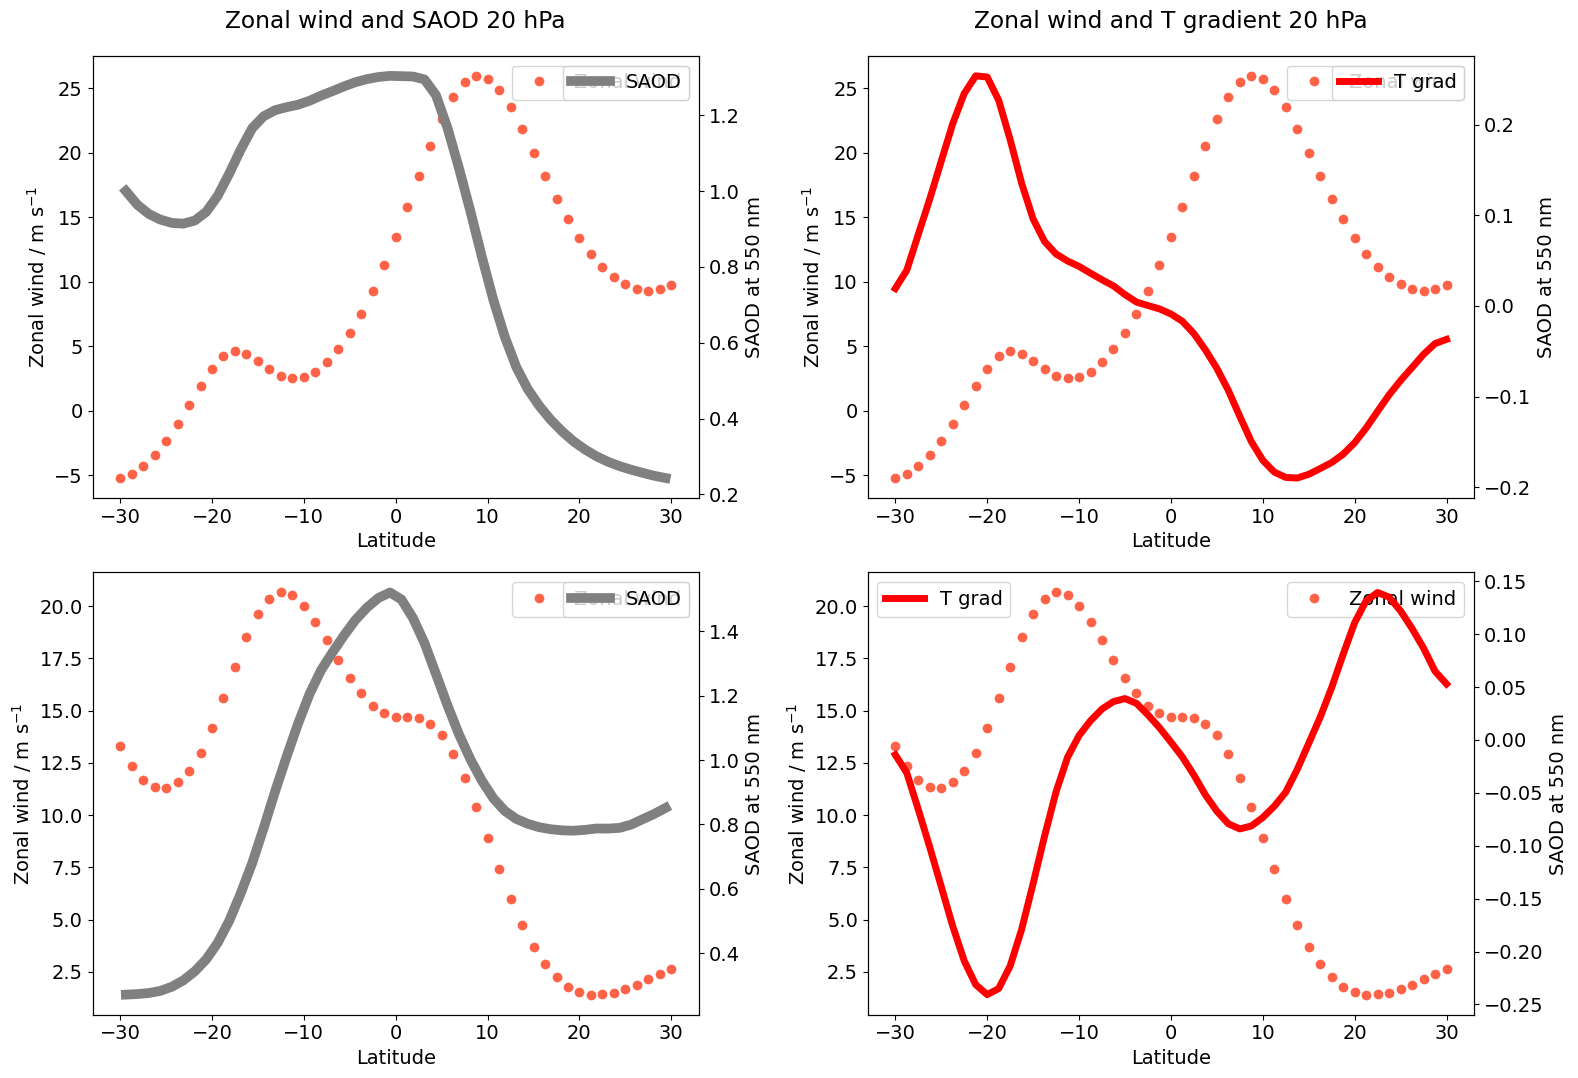

In [23]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(16, 11))

## zonal wind and SAOD

ydata = zon_trop[1][5].data
ax1.plot(zon_trop[1][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind', zorder=100)
ax1.set_ylabel('Zonal wind / m s$^{-1}$')
ax1.set_xlabel('Latitude')

axb = ax1.twinx()
ydata = SAOD_trop[1][5].data
axb.plot(SAOD_trop[1][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('SAOD at 550 nm')

ax1.legend()
axb.legend()

ax1.set_title('Zonal wind and SAOD 20 hPa', pad=20)

## zonal wind and SAOD

ydata = zon_trop[1][5].data
ax2.plot(zon_trop[1][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind', zorder=100)
ax2.set_ylabel('Zonal wind / m s$^{-1}$')
ax2.set_xlabel('Latitude')

axb = ax2.twinx()
ydata = T_gradient[1][5]
axb.plot(zon_trop[1][5].coord('latitude').points, ydata, color='red', linewidth=5, label='T grad', zorder=0)
axb.set_ylabel('SAOD at 550 nm')


ax2.legend()
axb.legend()

ax2.set_title('Zonal wind and T gradient 20 hPa', pad=20)


## zonal wind and SAOD

ydata = zon_trop[0][5].data
ax3.plot(zon_trop[0][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind', zorder=100)
ax3.set_ylabel('Zonal wind / m s$^{-1}$')
ax3.set_xlabel('Latitude')

axb = ax3.twinx()
ydata = SAOD_trop[0][5].data
axb.plot(SAOD_trop[0][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('SAOD at 550 nm')

ax3.legend()
axb.legend()


## zonal wind and SAOD

ydata = zon_trop[0][5].data
ax4.plot(zon_trop[0][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind', zorder=100)
ax4.set_ylabel('Zonal wind / m s$^{-1}$')
ax4.set_xlabel('Latitude')

axb = ax4.twinx()
ydata = T_gradient[0][5]
axb.plot(zon_trop[0][5].coord('latitude').points, ydata, color='red', linewidth=5, label='T grad', zorder=0)
axb.set_ylabel('SAOD at 550 nm')


ax4.legend()
axb.legend()


plt.tight_layout()

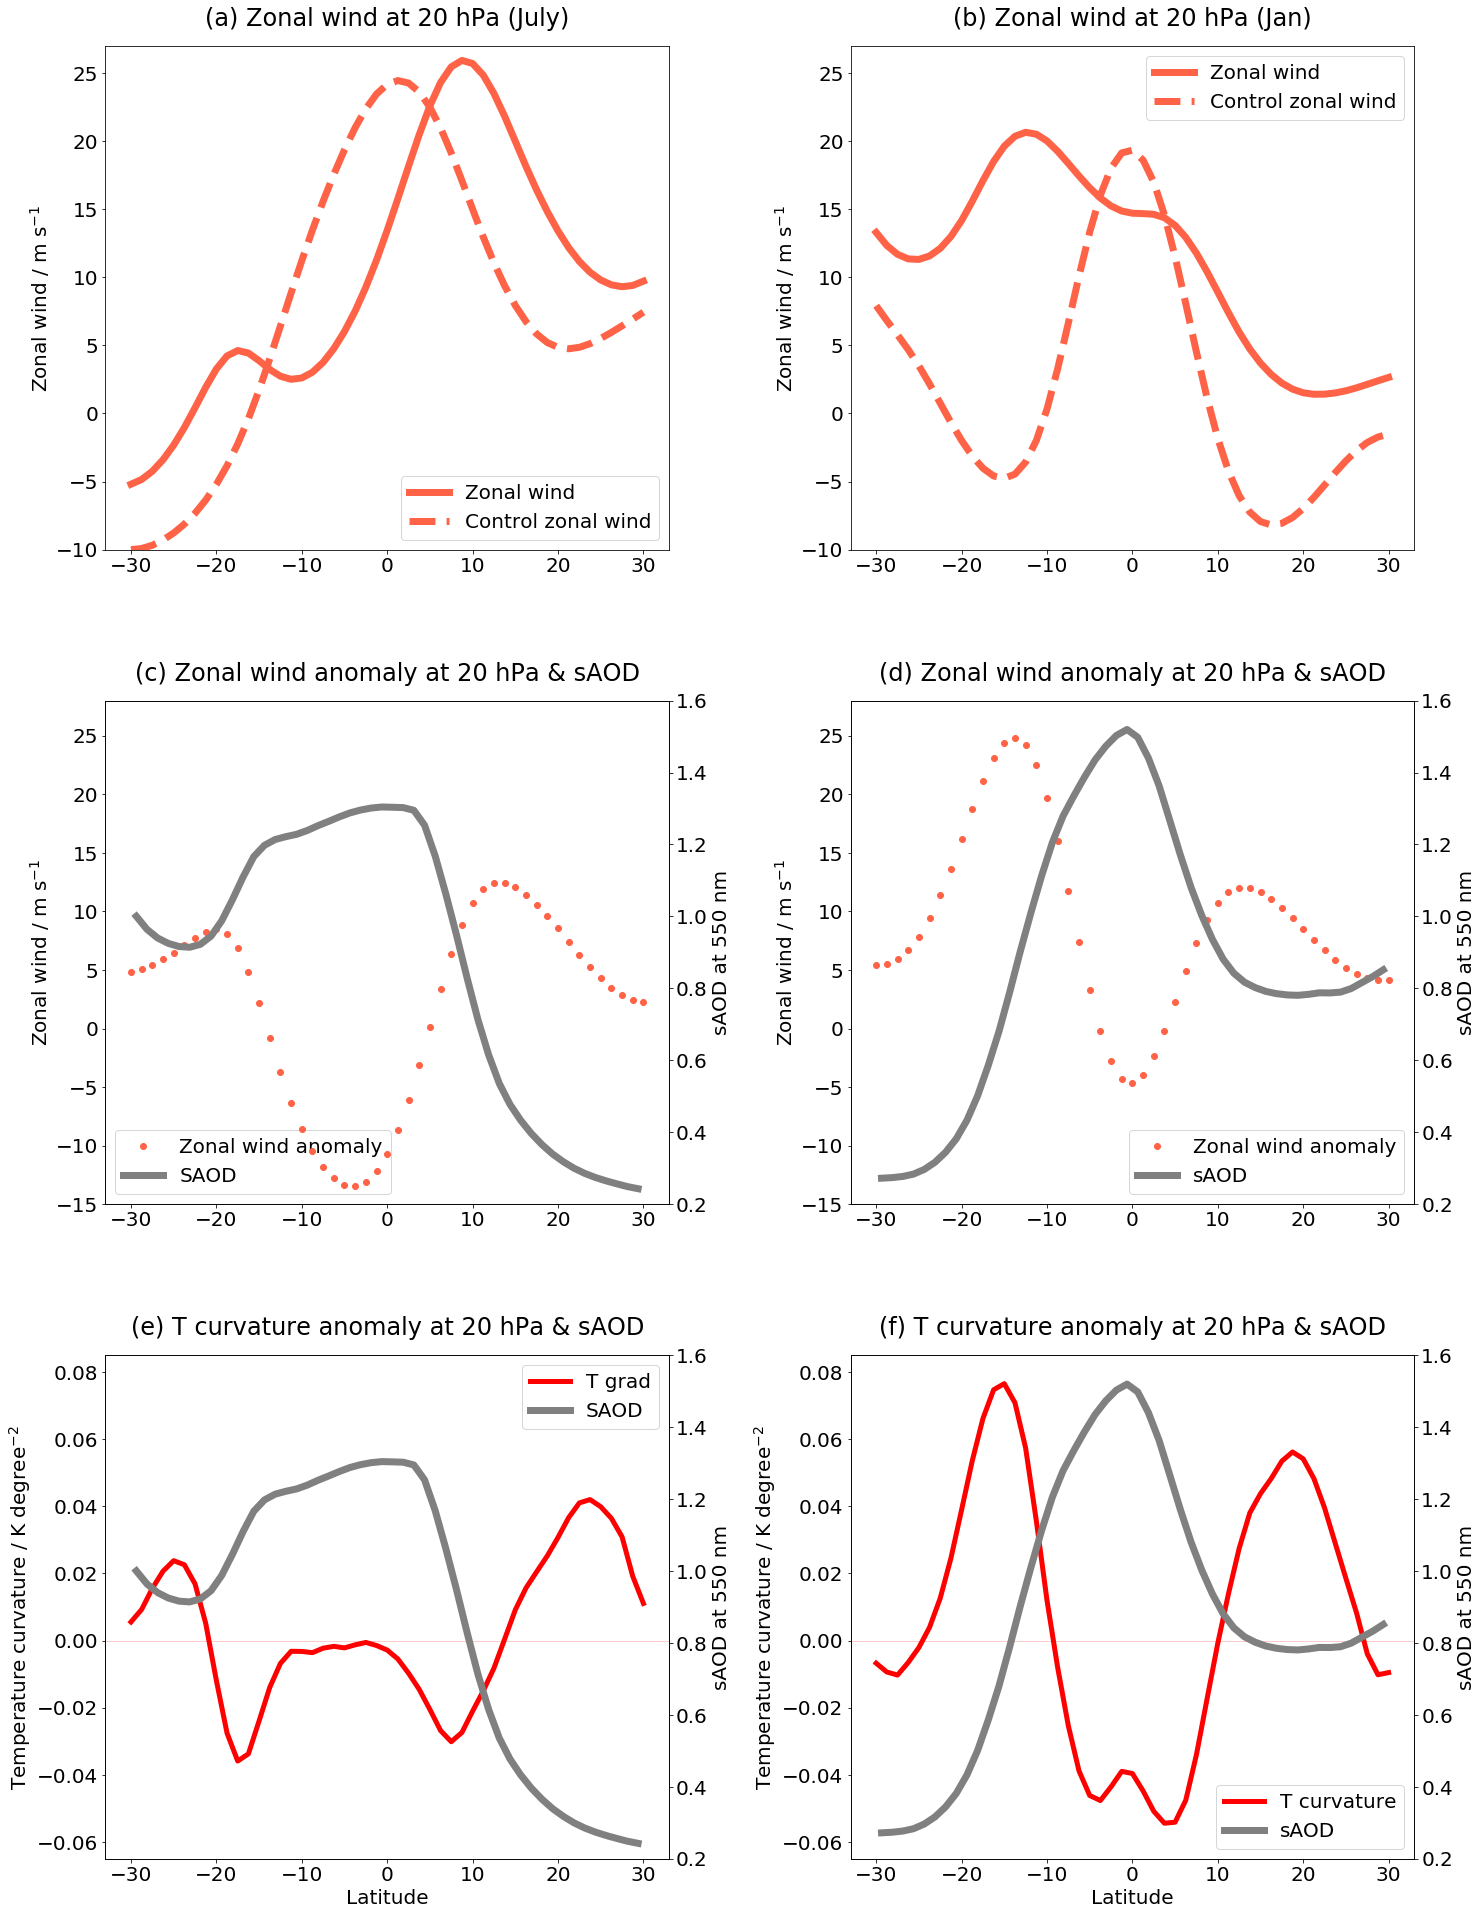

In [52]:
fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(3,2, figsize=(21, 27))

## zonal wind and SAOD

ydata = zon_trop[1][5].data
ax1.plot(zon_trop[1][5].coord('latitude').points, ydata, linewidth=7, color='tomato', label='Zonal wind', zorder=100)
ydata = zonc_trop[1][5].data
ax1.plot(zonc_trop[1][5].coord('latitude').points, ydata, color='tomato', label='Control zonal wind', linewidth=7, linestyle='--', zorder=100)
ax1.set_ylabel('Zonal wind / m s$^{-1}$')
#ax1.set_xlabel('Latitude')
ax1.legend(loc='lower right')

ax1.set_title('(a) Zonal wind at 20 hPa (July)', pad=20)

## zonal wind and SAOD

ydata = zon_trop[1][5].data - zonc_trop[1][5].data
ax2.plot(zon_trop[1][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind anomaly', zorder=100)
ax2.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax2.set_ylabel('Zonal wind / m s$^{-1}$')
#ax2.set_xlabel('Latitude')

axb = ax2.twinx()
ydata = SAOD_trop[1][5].data
axb.plot(SAOD_trop[1][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax2.legend(loc='lower left')

ax2.set_title('(c) Zonal wind anomaly at 20 hPa & sAOD', pad=20)
#ax1.set_title('w-QBO, July', pad=20, x=1, fontweight='bold', size=20, loc='left')


#t graient
ydata = T_gradient2[1][5] - Tc_gradient2[1][5]
ax3.plot(zon_trop[1][5].coord('latitude').points, ydata, color='red', linewidth=5, label='T grad', zorder=0)
ax3.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax3.set_ylabel('Temperature curvature / K degree$^{-2}$')

axb = ax3.twinx()
ydata = SAOD_trop[1][5].data
axb.plot(SAOD_trop[1][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax3.set_title('(e) T curvature anomaly at 20 hPa & sAOD', pad=20)
ax3.legend(loc='upper right')

## zonal wind and SAOD

ydata = zon_trop[0][5].data
ax4.plot(zon_trop[0][5].coord('latitude').points, ydata, color='tomato', linewidth=7, label='Zonal wind', zorder=100)
ydata = zonc_trop[0][5].data
ax4.plot(zonc_trop[0][5].coord('latitude').points, ydata, color='tomato', linewidth=7, label='Control zonal wind', linestyle='--', zorder=100)
ax4.set_ylabel('Zonal wind / m s$^{-1}$')
ax3.set_xlabel('Latitude')
ax4.legend(loc='upper right')

ax4.set_title('(b) Zonal wind at 20 hPa (Jan)', pad=20)

## zonal wind and SAOD

ydata = zon_trop[0][5].data - zonc_trop[0][5].data
ax5.plot(zon_trop[0][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind anomaly', zorder=100)
ax5.plot(0,0, color='grey', linewidth=7, label='sAOD', zorder=0)
ax5.set_ylabel('Zonal wind / m s$^{-1}$')
ax6.set_xlabel('Latitude')

axb = ax5.twinx()
ydata = SAOD_trop[0][5].data
axb.plot(SAOD_trop[0][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax5.legend(loc='lower right')

ax5.set_title('(d) Zonal wind anomaly at 20 hPa & sAOD', pad=20)
#ax5.set_title('w-QBO, Jan', pad=20, x=1, fontweight='bold', size=20, loc='left')


#t graient
ydata = T_gradient2[0][5] - Tc_gradient2[0][5]
ax6.plot(zon_trop[0][5].coord('latitude').points, ydata, color='red', linewidth=5, label='T curvature', zorder=0)
ax6.plot(0,0, color='grey', linewidth=7, label='sAOD', zorder=0)
ax6.set_ylabel('Temperature curvature / K degree$^{-2}$')

axb = ax6.twinx()
ydata = SAOD_trop[0][5].data
axb.plot(SAOD_trop[0][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax6.set_title('(f) T curvature anomaly at 20 hPa & sAOD', pad=20)
ax6.legend(loc='lower right')

##set axis limit
ax1.set_ylim(-10,27)
ax4.set_ylim(-10,27)

ax2.set_ylim(-15,28)
ax5.set_ylim(-15,28)

ax3.set_ylim(-0.065,0.085)
ax6.set_ylim(-0.065,0.085)

ax3.axhline(0, color='red', linewidth=1,zorder=0,alpha=0.2)
ax6.axhline(0, color='red', linewidth=1,zorder=0,alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

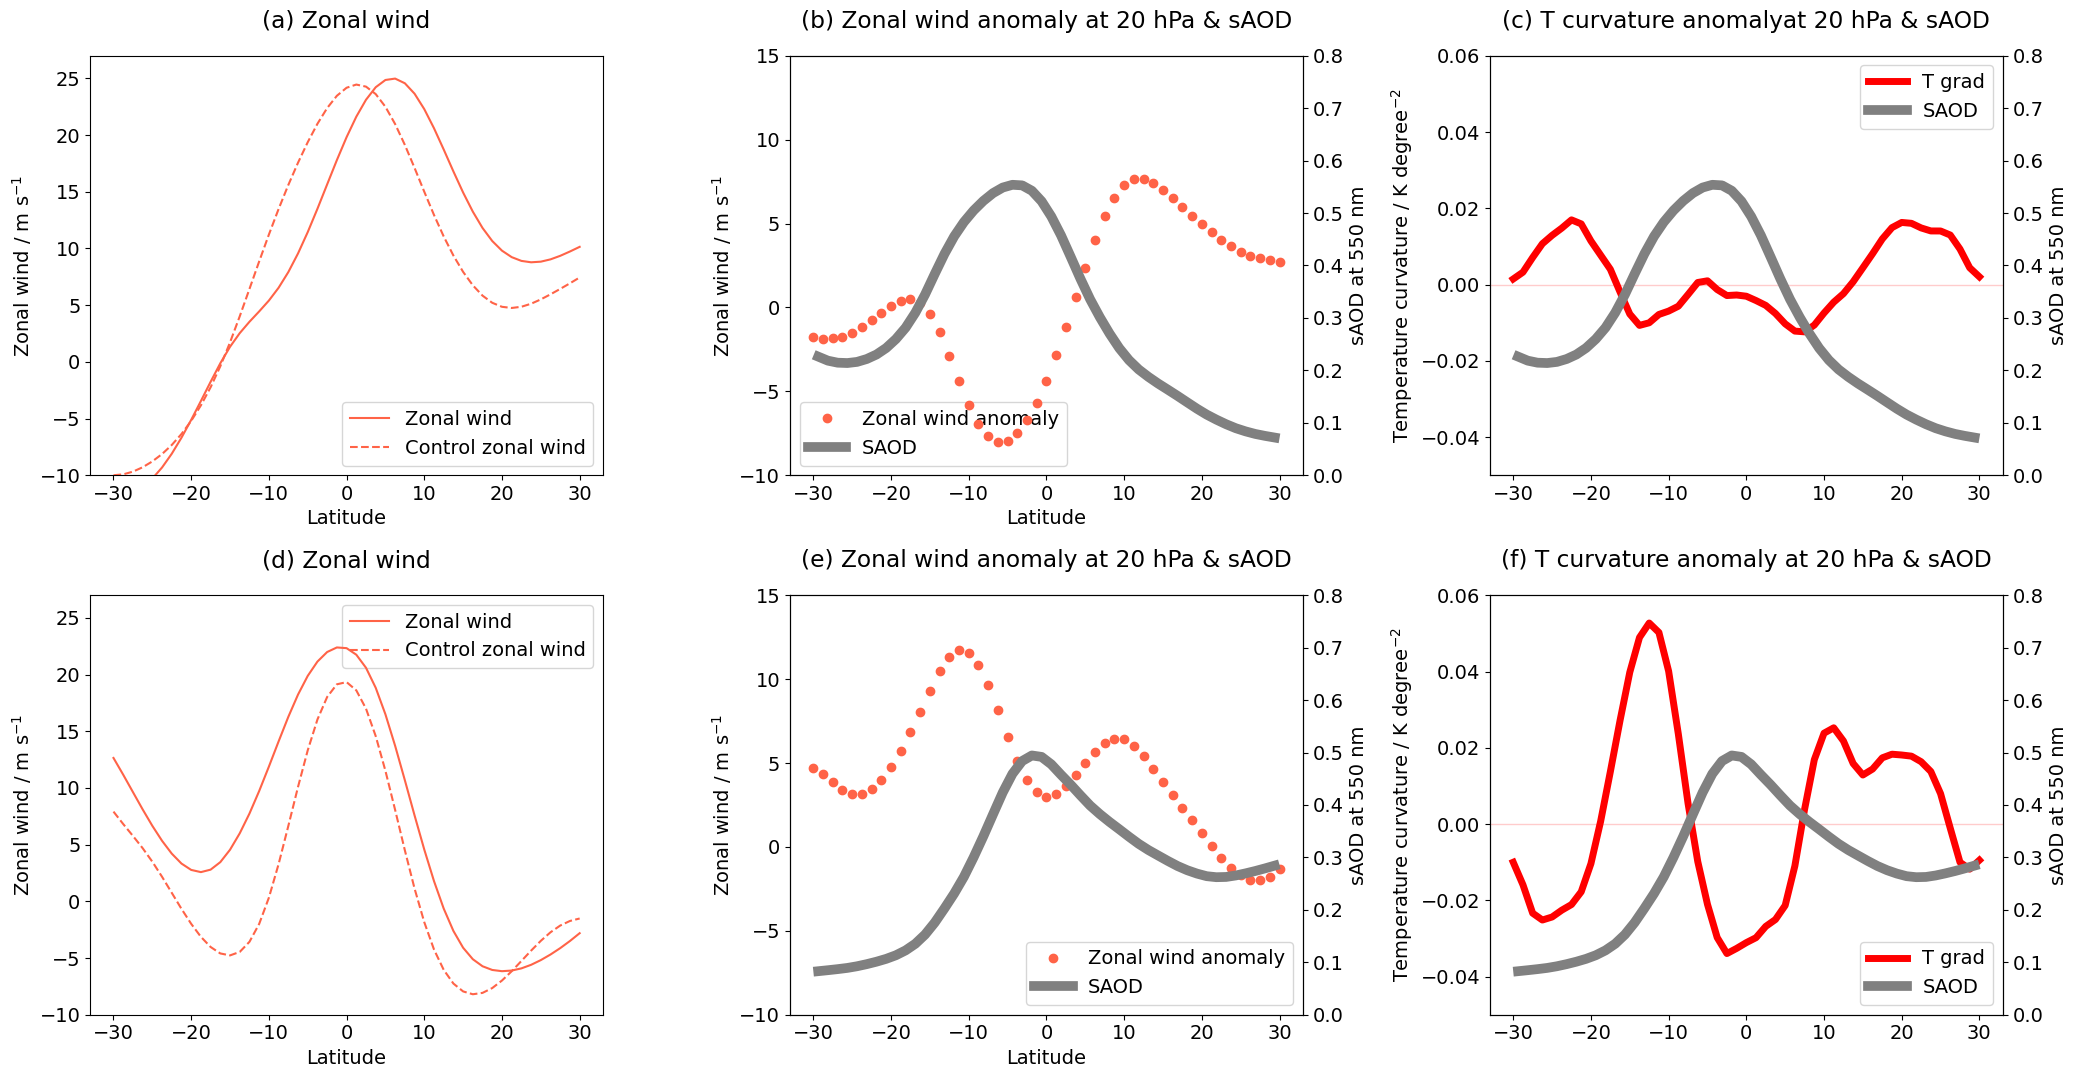

In [51]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(21, 11))

## zonal wind and SAOD

ydata = zon_trop[3][5].data
ax1.plot(zon_trop[3][5].coord('latitude').points, ydata, color='tomato', label='Zonal wind', zorder=100)
ydata = zonc_trop[3][5].data
ax1.plot(zonc_trop[3][5].coord('latitude').points, ydata, color='tomato', label='Control zonal wind', linestyle='--', zorder=100)
ax1.set_ylabel('Zonal wind / m s$^{-1}$')
ax1.set_xlabel('Latitude')
ax1.legend(loc='lower right')

ax1.set_title('(a) Zonal wind', pad=20)

## zonal wind and SAOD

ydata = zon_trop[3][5].data - zonc_trop[3][5].data
ax2.plot(zon_trop[3][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind anomaly', zorder=100)
ax2.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax2.set_ylabel('Zonal wind / m s$^{-1}$')
ax2.set_xlabel('Latitude')

axb = ax2.twinx()
ydata = SAOD_trop[3][5].data
axb.plot(SAOD_trop[3][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0, 0.8)

ax2.legend(loc='lower left')

ax2.set_title('(b) Zonal wind anomaly at 20 hPa & sAOD', pad=20)
#ax1.set_title('w-QBO, July', pad=20, x=1, fontweight='bold', size=20, loc='left')


#t graient
ydata = T_gradient2[3][5] - Tc_gradient2[3][5]
ax3.plot(zon_trop[3][5].coord('latitude').points, ydata, color='red', linewidth=5, label='T grad', zorder=0)
ax3.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax3.set_ylabel('Temperature curvature / K degree$^{-2}$')

axb = ax3.twinx()
ydata = SAOD_trop[3][5].data
axb.plot(SAOD_trop[3][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0, 0.8)

ax3.set_title('(c) T curvature anomalyat 20 hPa & sAOD', pad=20)
ax3.legend(loc='upper right')

## zonal wind and SAOD

ydata = zon_trop[2][5].data
ax4.plot(zon_trop[2][5].coord('latitude').points, ydata, color='tomato', label='Zonal wind', zorder=100)
ydata = zonc_trop[2][5].data
ax4.plot(zonc_trop[2][5].coord('latitude').points, ydata, color='tomato', label='Control zonal wind', linestyle='--', zorder=100)
ax4.set_ylabel('Zonal wind / m s$^{-1}$')
ax4.set_xlabel('Latitude')
ax4.legend(loc='upper right')

ax4.set_title('(d) Zonal wind', pad=20)

## zonal wind and SAOD

ydata = zon_trop[2][5].data - zonc_trop[2][5].data
ax5.plot(zon_trop[2][5].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind anomaly', zorder=100)
ax5.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax5.set_ylabel('Zonal wind / m s$^{-1}$')
ax5.set_xlabel('Latitude')

axb = ax5.twinx()
ydata = SAOD_trop[2][5].data
axb.plot(SAOD_trop[2][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0, 0.8)

ax5.legend(loc='lower right')

ax5.set_title('(e) Zonal wind anomaly at 20 hPa & sAOD', pad=20)
#ax5.set_title('w-QBO, Jan', pad=20, x=1, fontweight='bold', size=20, loc='left')


#t graient
ydata = T_gradient2[2][5] - Tc_gradient2[2][5]
ax6.plot(zon_trop[2][5].coord('latitude').points, ydata, color='red', linewidth=5, label='T grad', zorder=0)
ax6.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax6.set_ylabel('Temperature curvature / K degree$^{-2}$')

axb = ax6.twinx()
ydata = SAOD_trop[2][5].data
axb.plot(SAOD_trop[2][5].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0, 0.8)

ax6.set_title('(f) T curvature anomaly at 20 hPa & sAOD', pad=20)
ax6.legend(loc='lower right')

##set axis limit
ax1.set_ylim(-10,27)
ax4.set_ylim(-10,27)

ax2.set_ylim(-10,15)
ax5.set_ylim(-10,15)

ax3.set_ylim(-0.05,0.06)
ax6.set_ylim(-0.05,0.06)

ax3.axhline(0, color='red', linewidth=1,zorder=0,alpha=0.2)
ax6.axhline(0, color='red', linewidth=1,zorder=0,alpha=0.2)

plt.tight_layout()

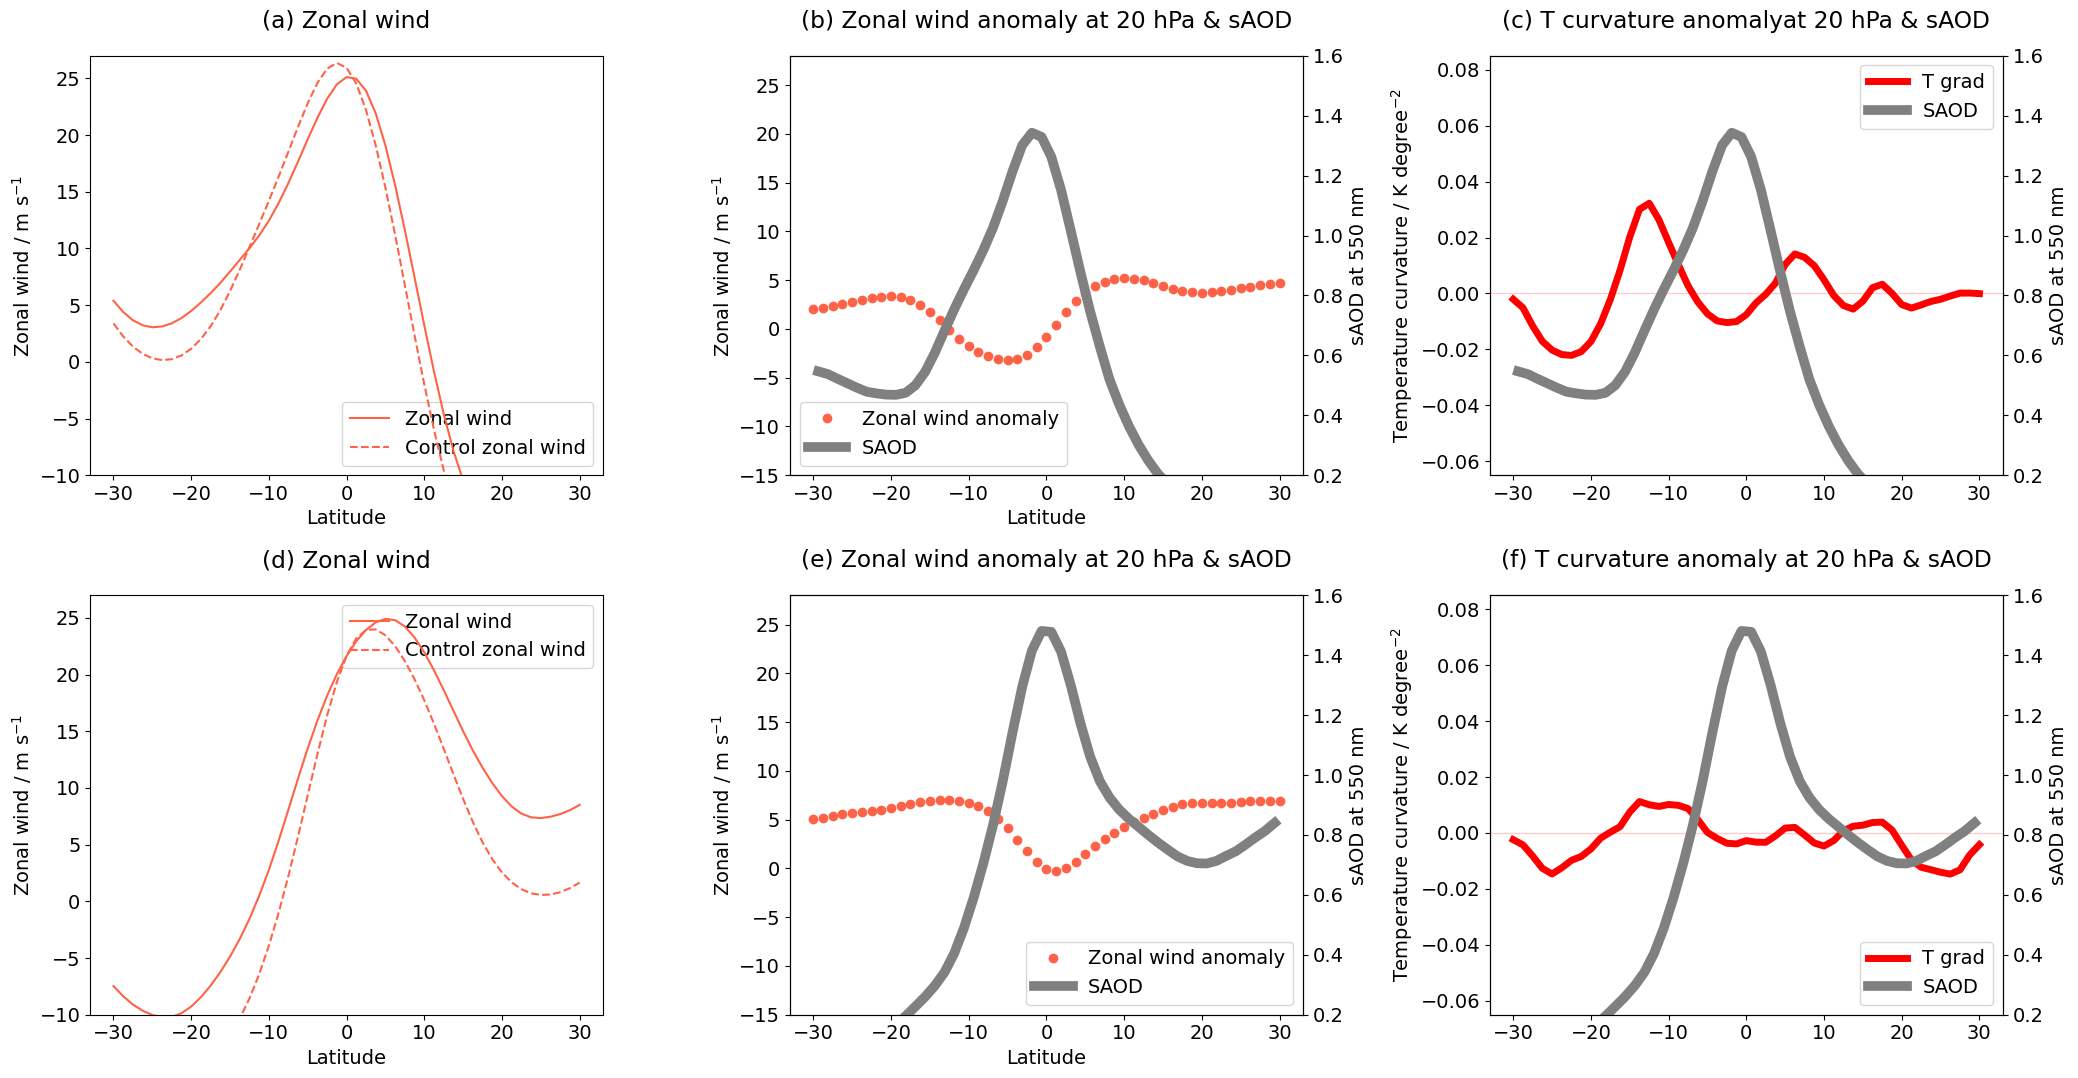

In [52]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(21, 11))

## zonal wind and SAOD

ydata = zon_trop[1][2].data
ax1.plot(zon_trop[1][2].coord('latitude').points, ydata, color='tomato', label='Zonal wind', zorder=100)
ydata = zonc_trop[1][2].data
ax1.plot(zonc_trop[1][2].coord('latitude').points, ydata, color='tomato', label='Control zonal wind', linestyle='--', zorder=100)
ax1.set_ylabel('Zonal wind / m s$^{-1}$')
ax1.set_xlabel('Latitude')
ax1.legend(loc='lower right')

ax1.set_title('(a) Zonal wind', pad=20)

## zonal wind and SAOD

ydata = zon_trop[1][2].data - zonc_trop[1][2].data
ax2.plot(zon_trop[1][2].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind anomaly', zorder=100)
ax2.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax2.set_ylabel('Zonal wind / m s$^{-1}$')
ax2.set_xlabel('Latitude')

axb = ax2.twinx()
ydata = SAOD_trop[1][2].data
axb.plot(SAOD_trop[1][2].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax2.legend(loc='lower left')

ax2.set_title('(b) Zonal wind anomaly at 20 hPa & sAOD', pad=20)
#ax1.set_title('w-QBO, July', pad=20, x=1, fontweight='bold', size=20, loc='left')


#t graient
ydata = T_gradient2[1][2] - Tc_gradient2[1][2]
ax3.plot(zon_trop[1][2].coord('latitude').points, ydata, color='red', linewidth=5, label='T grad', zorder=0)
ax3.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax3.set_ylabel('Temperature curvature / K degree$^{-2}$')

axb = ax3.twinx()
ydata = SAOD_trop[1][2].data
axb.plot(SAOD_trop[1][2].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax3.set_title('(c) T curvature anomalyat 20 hPa & sAOD', pad=20)
ax3.legend(loc='upper right')

## zonal wind and SAOD

ydata = zon_trop[0][2].data
ax4.plot(zon_trop[0][2].coord('latitude').points, ydata, color='tomato', label='Zonal wind', zorder=100)
ydata = zonc_trop[0][2].data
ax4.plot(zonc_trop[0][2].coord('latitude').points, ydata, color='tomato', label='Control zonal wind', linestyle='--', zorder=100)
ax4.set_ylabel('Zonal wind / m s$^{-1}$')
ax4.set_xlabel('Latitude')
ax4.legend(loc='upper right')

ax4.set_title('(d) Zonal wind', pad=20)

## zonal wind and SAOD

ydata = zon_trop[0][2].data - zonc_trop[0][2].data
ax5.plot(zon_trop[0][2].coord('latitude').points, ydata, 'o', color='tomato', label='Zonal wind anomaly', zorder=100)
ax5.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax5.set_ylabel('Zonal wind / m s$^{-1}$')
ax5.set_xlabel('Latitude')

axb = ax5.twinx()
ydata = SAOD_trop[0][2].data
axb.plot(SAOD_trop[0][2].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax5.legend(loc='lower right')

ax5.set_title('(e) Zonal wind anomaly at 20 hPa & sAOD', pad=20)
#ax5.set_title('w-QBO, Jan', pad=20, x=1, fontweight='bold', size=20, loc='left')


#t graient
ydata = T_gradient2[0][2] - Tc_gradient2[0][2]
ax6.plot(zon_trop[0][2].coord('latitude').points, ydata, color='red', linewidth=5, label='T grad', zorder=0)
ax6.plot(0,0, color='grey', linewidth=7, label='SAOD', zorder=0)
ax6.set_ylabel('Temperature curvature / K degree$^{-2}$')

axb = ax6.twinx()
ydata = SAOD_trop[0][2].data
axb.plot(SAOD_trop[0][2].coord('latitude').points, ydata, color='grey', linewidth=7, label='SAOD', zorder=0)
axb.set_ylabel('sAOD at 550 nm')
axb.set_ylim(0.2, 1.6)

ax6.set_title('(f) T curvature anomaly at 20 hPa & sAOD', pad=20)
ax6.legend(loc='lower right')

##set axis limit
ax1.set_ylim(-10,27)
ax4.set_ylim(-10,27)

ax2.set_ylim(-15,28)
ax5.set_ylim(-15,28)

ax3.set_ylim(-0.065,0.085)
ax6.set_ylim(-0.065,0.085)

ax3.axhline(0, color='red', linewidth=1,zorder=0,alpha=0.2)
ax6.axhline(0, color='red', linewidth=1,zorder=0,alpha=0.2)

plt.tight_layout()